In [1]:
# 5. Test NVDI Monthly composite

### 1. Imports

In [2]:
from pathlib import Path
import numpy as np
import pandas as pd
import rasterio
import matplotlib.pyplot as plt

from thess_geo_analytics.utils.RepoPaths import RepoPaths
from thess_geo_analytics.pipelines.BuildNdviMonthlyCompositePipeline import (
    BuildNdviMonthlyCompositePipeline,
    BuildNdviMonthlyCompositeParams,
)


### 2. Params

In [3]:
aoi_filename = "EL522_Thessaloniki.geojson"
aoi_id = "el522"

time_serie_csv = RepoPaths.table("scenes_selected.csv")
assets_manifest_csv = RepoPaths.table("assets_manifest_selected.csv")

build_all_periods = True
single_month = None  # example: "2025-08"


### 3. Run monthly composite pipeline

In [4]:
pipe = BuildNdviMonthlyCompositePipeline()

params = BuildNdviMonthlyCompositeParams(
    aoi_path=RepoPaths.aoi(aoi_filename),
    aoi_id=aoi_id,
    month=single_month,
    time_serie_csv=time_serie_csv,
    assets_manifest_csv=assets_manifest_csv,
    max_scenes_per_period=None,
    download_missing=False,
    verbose=True,
    min_scenes_per_month=2,
    fallback_to_quarterly=True,
)

outputs = pipe.run(params)


C:\Users\alexr\OneDrive\Desktop\thess-geo-analytics\src\thess_geo_analytics\builders\MonthlyCompositeBuilder.py:277: RuntimeWarning: All-NaN slice encountered
  composite = np.nanmedian(stack, axis=0).astype(np.float32)


[OK] period=2025-Q1 scenes_used=1 skipped=0
[OK] Written:  C:\Users\alexr\OneDrive\Desktop\thess-geo-analytics\outputs\cogs\ndvi_2025-Q1_el522.tif
[OK] Preview:  C:\Users\alexr\OneDrive\Desktop\thess-geo-analytics\outputs\figures\ndvi_2025-Q1_preview.png


C:\Users\alexr\OneDrive\Desktop\thess-geo-analytics\src\thess_geo_analytics\builders\MonthlyCompositeBuilder.py:277: RuntimeWarning: All-NaN slice encountered
  composite = np.nanmedian(stack, axis=0).astype(np.float32)


[OK] period=2025-Q2 scenes_used=3 skipped=0
[OK] Written:  C:\Users\alexr\OneDrive\Desktop\thess-geo-analytics\outputs\cogs\ndvi_2025-Q2_el522.tif
[OK] Preview:  C:\Users\alexr\OneDrive\Desktop\thess-geo-analytics\outputs\figures\ndvi_2025-Q2_preview.png


C:\Users\alexr\OneDrive\Desktop\thess-geo-analytics\src\thess_geo_analytics\builders\MonthlyCompositeBuilder.py:277: RuntimeWarning: All-NaN slice encountered
  composite = np.nanmedian(stack, axis=0).astype(np.float32)


[OK] period=2025-Q3 scenes_used=3 skipped=0
[OK] Written:  C:\Users\alexr\OneDrive\Desktop\thess-geo-analytics\outputs\cogs\ndvi_2025-Q3_el522.tif
[OK] Preview:  C:\Users\alexr\OneDrive\Desktop\thess-geo-analytics\outputs\figures\ndvi_2025-Q3_preview.png


C:\Users\alexr\OneDrive\Desktop\thess-geo-analytics\src\thess_geo_analytics\builders\MonthlyCompositeBuilder.py:277: RuntimeWarning: All-NaN slice encountered
  composite = np.nanmedian(stack, axis=0).astype(np.float32)


[OK] period=2025-Q4 scenes_used=3 skipped=0
[OK] Written:  C:\Users\alexr\OneDrive\Desktop\thess-geo-analytics\outputs\cogs\ndvi_2025-Q4_el522.tif
[OK] Preview:  C:\Users\alexr\OneDrive\Desktop\thess-geo-analytics\outputs\figures\ndvi_2025-Q4_preview.png


C:\Users\alexr\OneDrive\Desktop\thess-geo-analytics\src\thess_geo_analytics\builders\MonthlyCompositeBuilder.py:277: RuntimeWarning: All-NaN slice encountered
  composite = np.nanmedian(stack, axis=0).astype(np.float32)


[OK] period=2026-Q1 scenes_used=1 skipped=0
[OK] Written:  C:\Users\alexr\OneDrive\Desktop\thess-geo-analytics\outputs\cogs\ndvi_2026-Q1_el522.tif
[OK] Preview:  C:\Users\alexr\OneDrive\Desktop\thess-geo-analytics\outputs\figures\ndvi_2026-Q1_preview.png


### 4. Validate Each output

In [15]:
print([len(x) for x in outputs])
print([(x[1:]) for x in outputs])

[3, 3, 3, 3, 3]
[(WindowsPath('C:/Users/alexr/OneDrive/Desktop/thess-geo-analytics/outputs/cogs/ndvi_2025-Q1_el522.tif'), WindowsPath('C:/Users/alexr/OneDrive/Desktop/thess-geo-analytics/outputs/figures/ndvi_2025-Q1_preview.png')), (WindowsPath('C:/Users/alexr/OneDrive/Desktop/thess-geo-analytics/outputs/cogs/ndvi_2025-Q2_el522.tif'), WindowsPath('C:/Users/alexr/OneDrive/Desktop/thess-geo-analytics/outputs/figures/ndvi_2025-Q2_preview.png')), (WindowsPath('C:/Users/alexr/OneDrive/Desktop/thess-geo-analytics/outputs/cogs/ndvi_2025-Q3_el522.tif'), WindowsPath('C:/Users/alexr/OneDrive/Desktop/thess-geo-analytics/outputs/figures/ndvi_2025-Q3_preview.png')), (WindowsPath('C:/Users/alexr/OneDrive/Desktop/thess-geo-analytics/outputs/cogs/ndvi_2025-Q4_el522.tif'), WindowsPath('C:/Users/alexr/OneDrive/Desktop/thess-geo-analytics/outputs/figures/ndvi_2025-Q4_preview.png')), (WindowsPath('C:/Users/alexr/OneDrive/Desktop/thess-geo-analytics/outputs/cogs/ndvi_2026-Q1_el522.tif'), WindowsPath('C:/Us

In [16]:
for tif_path, png_path in [x[1:] for x in outputs]:
    print("Validating:", tif_path.name)

    with rasterio.open(tif_path) as ds:
        arr = ds.read(1)

    valid = arr[arr != ds.nodata]

    print("  shape:", arr.shape)
    print("  valid pixels:", valid.size)
    print("  min:", np.nanmin(valid))
    print("  max:", np.nanmax(valid))
    print("  mean:", np.nanmean(valid))


Validating: ndvi_2025-Q1_el522.tif
  shape: (7328, 10747)
  valid pixels: 1281177
  min: -0.5466831
  max: 0.8058814
  mean: 0.32309335
Validating: ndvi_2025-Q2_el522.tif
  shape: (7328, 10747)
  valid pixels: 27519772
  min: -0.39713702
  max: 0.85858583
  mean: 0.3858383
Validating: ndvi_2025-Q3_el522.tif
  shape: (7328, 10747)
  valid pixels: 31718284
  min: -0.5652174
  max: 0.73513806
  mean: 0.3271713
Validating: ndvi_2025-Q4_el522.tif
  shape: (7328, 10747)
  valid pixels: 27863378
  min: -1.0
  max: 1.0
  mean: 0.28986812
Validating: ndvi_2026-Q1_el522.tif
  shape: (7328, 10747)
  valid pixels: 1079941
  min: -0.17570755
  max: 1.0
  mean: 0.37882173


### 5. Visual Check (Improved Stretch)

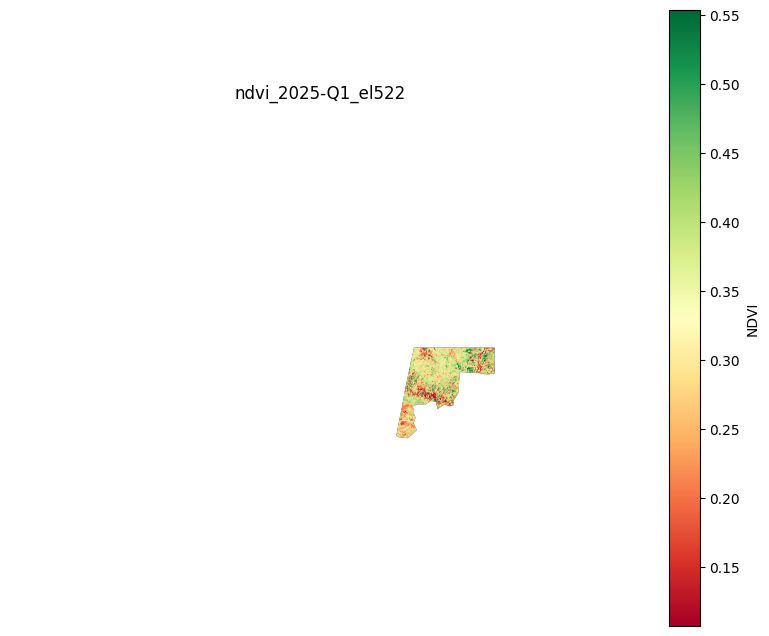

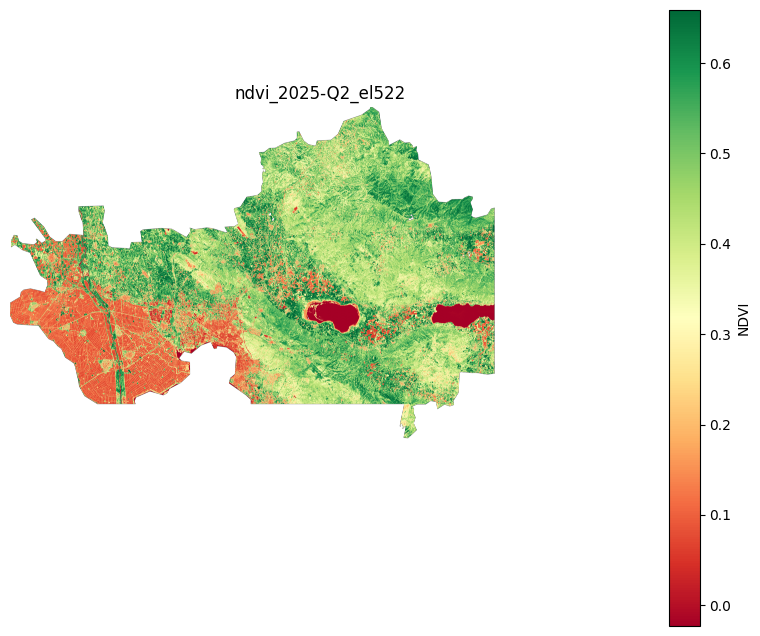

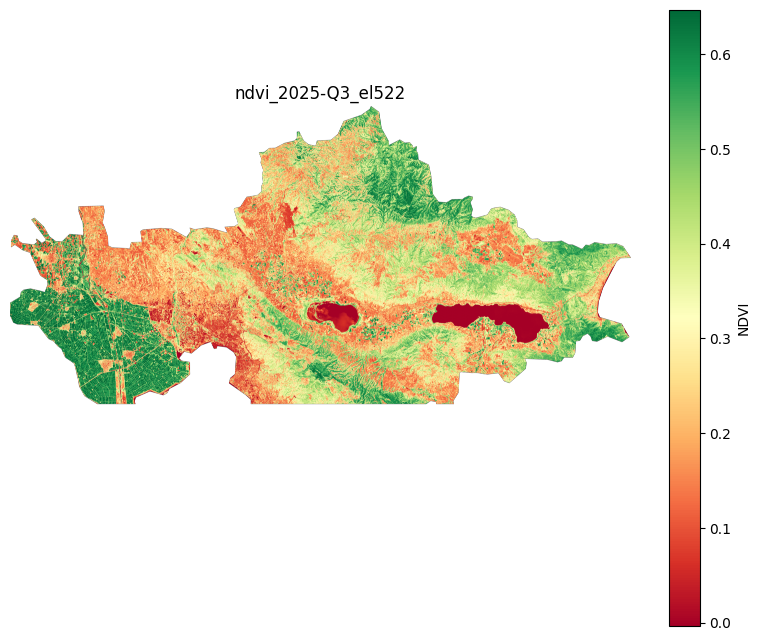

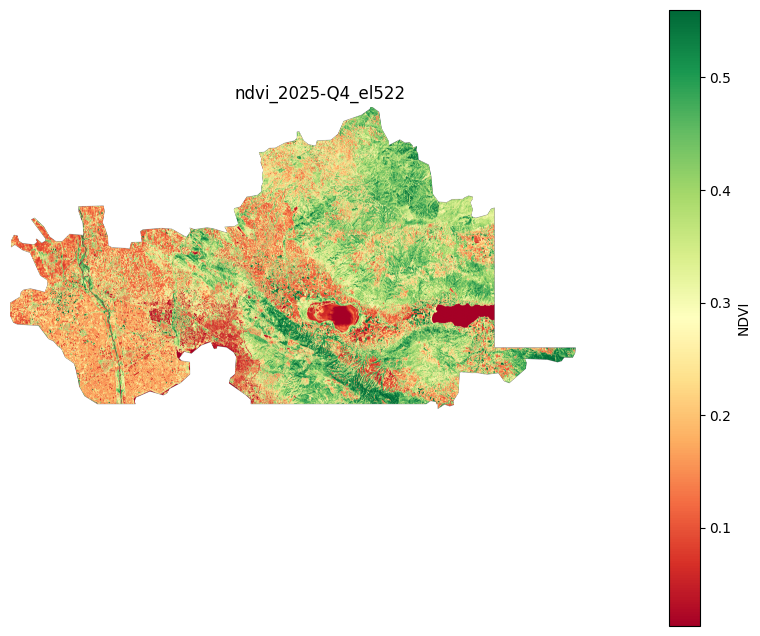

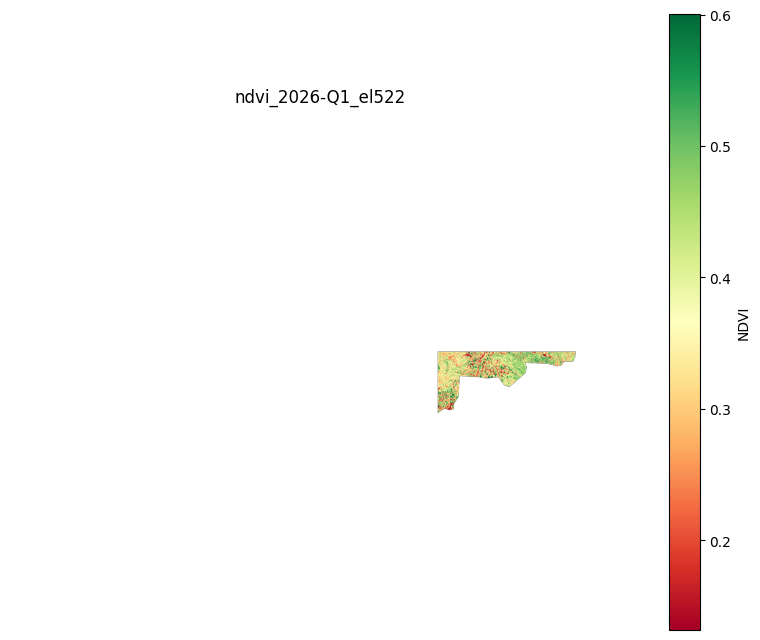

In [19]:
for tif_path, _ in [x[1:] for x in outputs]:
    with rasterio.open(tif_path) as ds:
        arr = ds.read(1).astype(float)
        arr[arr == ds.nodata] = np.nan

    valid = arr[~np.isnan(arr)]
    vmin = np.percentile(valid, 2)
    vmax = np.percentile(valid, 98)

    plt.figure(figsize=(10, 8))
    plt.imshow(arr, cmap="RdYlGn", vmin=vmin, vmax=vmax)
    plt.title(tif_path.stem)
    plt.colorbar(label="NDVI")
    plt.axis("off")
    plt.show()



### 6. Historgam

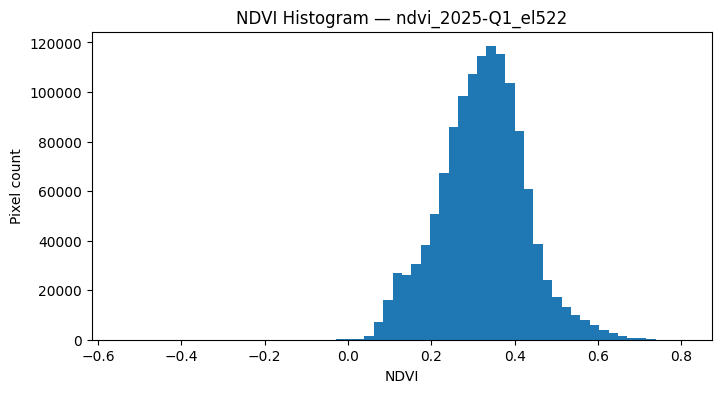

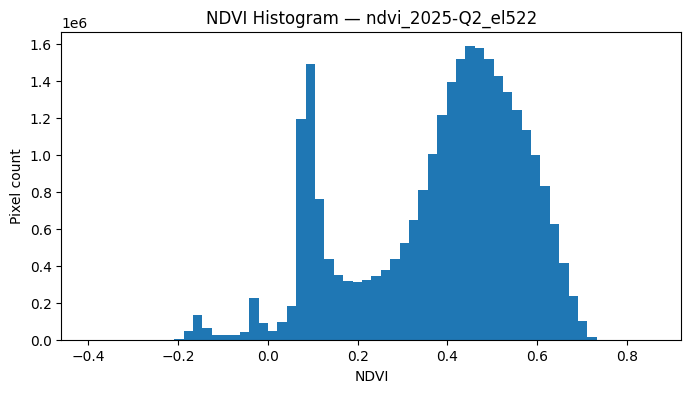

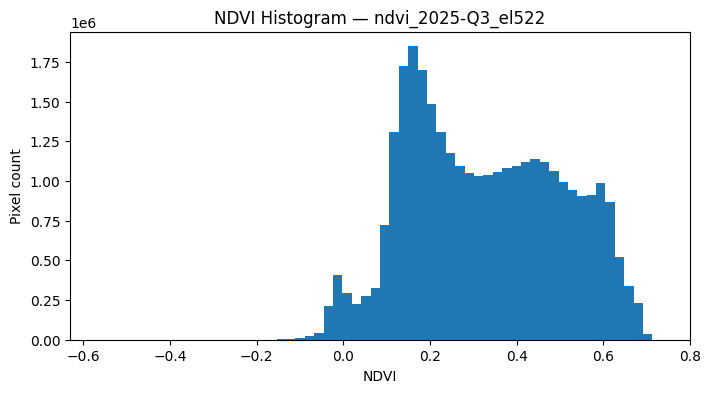

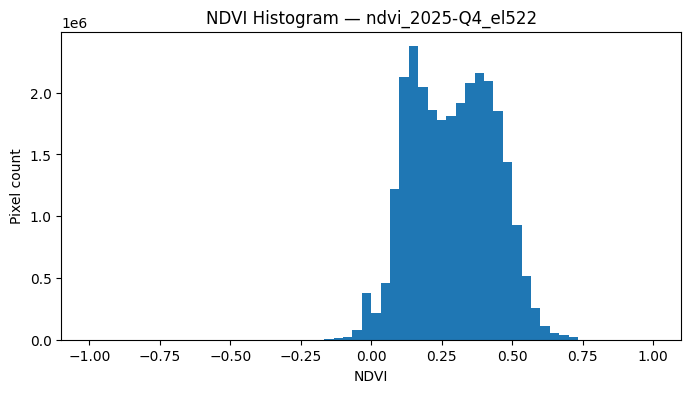

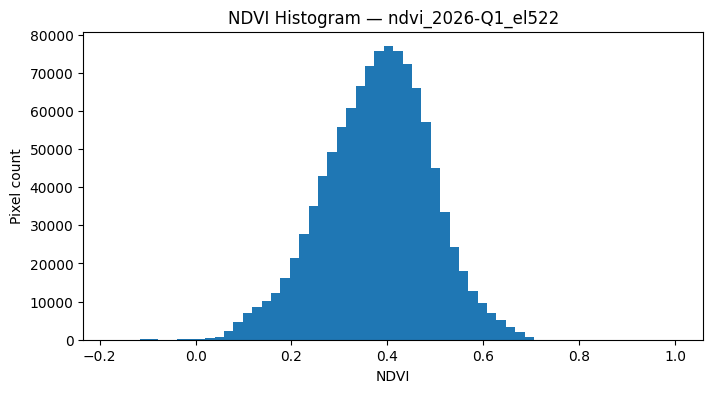

In [20]:
for tif_path, _ in [x[1:] for x in outputs]:
    with rasterio.open(tif_path) as ds:
        arr = ds.read(1).astype(float)
        arr[arr == ds.nodata] = np.nan

    valid = arr[~np.isnan(arr)]

    plt.figure(figsize=(8, 4))
    plt.hist(valid, bins=60)
    plt.title(f"NDVI Histogram — {tif_path.stem}")
    plt.xlabel("NDVI")
    plt.ylabel("Pixel count")
    plt.show()
